--------------------------------
---                          ---
---   Welcome to TigaSplit   ---
---                          ---
--------------------------------
  1  Add a bill
  2  Make a payment
  3  Add a splitmate
  4  View Summary
  5  View Transaction History
  6  Export Transactions to CSV
  7  Email the Splitmate
  8  View the Chart
  9  Quit
--------------------------------
Enter your selection: 8
Enter the filename of the csv file for your transaction history; don't type in csv entension: gg
The file does not exist. Go back to main menu? ([Y]es/[N]o)y
--------------------------------
---                          ---
---   Welcome to TigaSplit   ---
---                          ---
--------------------------------
  1  Add a bill
  2  Make a payment
  3  Add a splitmate
  4  View Summary
  5  View Transaction History
  6  Export Transactions to CSV
  7  Email the Splitmate
  8  View the Chart
  9  Quit
--------------------------------
Enter your selection: 8
Enter the file

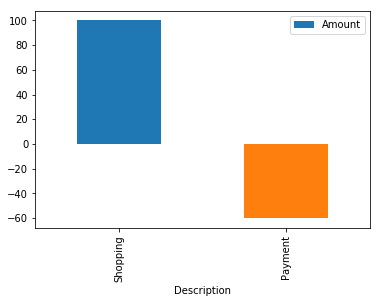

Press ENTER to go back to main menu:
--------------------------------
---                          ---
---   Welcome to TigaSplit   ---
---                          ---
--------------------------------
  1  Add a bill
  2  Make a payment
  3  Add a splitmate
  4  View Summary
  5  View Transaction History
  6  Export Transactions to CSV
  7  Email the Splitmate
  8  View the Chart
  9  Quit
--------------------------------
Enter your selection: 8
Enter the filename of the csv file for your transaction history; don't type in csv entension: new


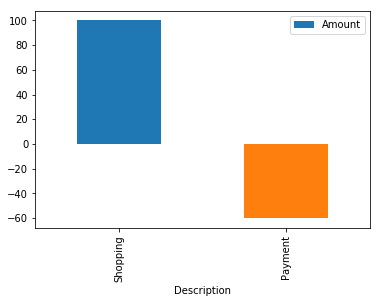

Press ENTER to go back to main menu:6
Please hit enter.
--------------------------------
---                          ---
---   Welcome to TigaSplit   ---
---                          ---
--------------------------------
  1  Add a bill
  2  Make a payment
  3  Add a splitmate
  4  View Summary
  5  View Transaction History
  6  Export Transactions to CSV
  7  Email the Splitmate
  8  View the Chart
  9  Quit
--------------------------------


In [ ]:
###This program was written by Changxing Wang, Zequn Che, Jiatian Xie. Special Thanks to Professor Fudge.


import requests
import json
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


splitmates = []
transactions = []
currency_exchange_rates = {}

def add_splitmate():
	print("\n--------------------------------")
	print("Add a splitmate")
	print("--------------------------------")
	while True:
		new_name = input("Full name of the new Splitmate (or \"cancel\" to cancel the operation): ").strip()
		if new_name.lower() == "cancel":
			return
		if len(new_name) < 1:
			continue
		duplicate = False
		for name in splitmates:
			if name.lower() == new_name.lower():
				duplicate = True
				print("%s already exists in the system, please try again."%(name))
				break
		if duplicate:
			continue
		splitmates.append(new_name)
		save_splitmates()
		inform("%s successfully being added to the system."%(new_name))
		return

def main_menu():
	while True:
		print("--------------------------------")
		print("---                          ---")
		print("---   Welcome to TigaSplit   ---")
		print("---                          ---")
		print("--------------------------------")
		options = ["Add a bill","Make a payment","Add a splitmate","View Summary","View Transaction History","Export Transactions to CSV","Email the Splitmate","View the Chart","Quit"]
		for i in range(0,len(options)):
			print("  %d  %s"%(i+1,options[i]))
		print("--------------------------------")
		while True:
			option = input("Enter your selection: ").strip()
			if len(option) < 1:
				continue
			try:
				option = int(option)
			except ValueError:
				print("Please type in the number representing the operation you are requesting")
				continue
			if option > 0 and option <= len(options):
				break
			print("The input number has no corresponding operation, please try again.")
		if option == len(options):
			print("Goodbye!")
			return()
		elif option == 1:
			add_bill()
		elif option == 2:
			make_payment()
		elif option == 3:
			add_splitmate()
		elif option == 4:
			view_summary()
		elif option == 5:
			view_transction_history()
		elif option == 6:
			export_transactions_csv()
			export_transactions_csv_plotting()
		elif option == 7:
			email_info()
		elif option == 8:
			view_chart()

def add_bill():
	lender = select_splitmate("the lender")
	borrower = select_splitmate("the borrower",[lender])
	currency_exchange_status = check_currency_exchange_rates_status()
	print("--------------------------------")
	print("Transaction Amount")
	print("--------------------------------")
	print("You can input your transaction amount as the following formats: ")
	print("123.45: We will treat it as amount in US Dollars")
	if currency_exchange_status:
		print("CNY123.45: You can use the 3-digit currency code followed by the numeric amount, we will convert it to US Dollar amount.")
		print("Supported currencies: " + ", ".join(currency_exchange_rates.keys()))
	else:
		print("Foreign currency support disabled due to lack of exchange rate data")
	print("--------------------------------")
	while True:
		text = input("Enter Transaction Amount: ").strip()
		try:
			amount = float(text)
		except:
			if not currency_exchange_status:
				continue
			try:
				amount = parse_amount_input(text)
			except:
				continue
		if amount > 0:
			break
		print("The dollar amount must be greater than 0, please try again.")
	print("\n--------------------------------")
	print("Transaction Description")
	print("--------------------------------")
	while True:
		description = input("Please enter transaction description: ").strip()
		if len(description) > 0:
			break
		print("Description cannot be empty, please try again.")

	print("\n--------------------------------")
	print("Confirm Transaction Detail")
	print("--------------------------------")
	print("Lender: " + get_splitmate_name(lender))
	print("Borrower: " + get_splitmate_name(borrower))
	print("Amount: USD " + str(amount))
	print("Description: " + description)
	print("--------------------------------")
	print()
	if confirm():
		transaction = {"lender":get_splitmate_name(lender),"borrower":get_splitmate_name(borrower),"amount":amount,"description":description}
		transactions.append(transaction)
		append_transaction(transaction)
		inform("Transaction recorded")
	else:
		inform("Transaction cancelled.")

def parse_amount_input(text):
	text = text.strip().upper()
	try:
		currency = text[0:3]
	except:
		print("We cannot recoganize the transaction amount you typed in. Please try again.")
		raise ValueError
	if currency not in currency_exchange_rates.keys():
		print("Unsupported currency type")
		raise ValueError
	try:
		number = float(text[3:].strip())
	except:
		print("We cannot parse the amount you typed in.")
		raise ValueError
	amount = int((number / currency_exchange_rates[currency]) * 100) / 100
	if amount <= 0:
		print("Error: The US Dollar amount of your input must be greater than 0")
		raise ValueError
	inform("According to the latest currency exhange rate published by European Central Bank,\n1 USD = %.2f %s\nThe amount you entered %s %.2f will be recorded as USD %.2f"%(currency_exchange_rates[currency],currency,currency,number,amount))
	return amount


def select_splitmate(desc="the Splitmate",exclude=[]):
	print("\n--------------------------------")
	print("Please select %s\n--------------------------------"%(desc))
	option_count = 1
	mapping = []
	for i in range(0,len(splitmates)):
		if i in exclude:
			continue
		mapping.append(i)
		print(" %3d  %s"%(option_count,get_splitmate_name(i)))
		option_count += 1
	if option_count > 1:
		print("----------")
	print(" %3d  %s"%(option_count,"Add a Splitmate that is not currently in the system"))
	print("\n--------------------------------")
	while True:
		try:
			selection = int(input("Enter your selection: "))
		except ValueError:
			print("Invalid input, Please input the number representing your selection.")
			continue
		if selection > 0 and selection <= option_count:
			break
		print("The input number has no corresponding option, please try again.")
	if selection == option_count:
		add_splitmate()
		return select_splitmate(desc,exclude)
	return mapping[selection-1]

def select_splitmate_from(list, desc="the Splitmate"):
	print("\n--------------------------------")
	print("Please select %s\n--------------------------------"%(desc))
	mapping = []
	for i in range(0,len(list)):
		mapping.append(list[i])
		print(" %3d  %s"%(i+1,get_splitmate_name(list[i])))
	print("\n--------------------------------")
	while True:
		try:
			selection = int(input("Enter your selection: "))
		except ValueError:
			print("Invalid input, Please input the number representing your selection.")
			continue
		if selection > 0 and selection <= len(list):
			break
		print("The input number has no corresponding option, please try again.")
	return mapping[selection-1]

def save_splitmates():
	file = open("splitmates.txt","w")
	for name in splitmates:
		file.write(name + "\n")
	file.close()

def load_splitmates():
	try:
		with open("splitmates.txt","r") as file:
		   for name in file:
		       splitmates.append(name.strip("\n"))
	except IOError:
		return

def append_transaction(transaction):
	file = open("transactions.txt","a")
	file.write(json.dumps(transaction) + "\n")
	file.close()

def load_transactions():
	try:
		with open("transactions.txt","r") as file:
			for transaction in file:
				transactions.append(json.loads(transaction.strip("\n")))
	except IOError:
		return

def get_splitmate_name(n):
	return splitmates[n]

def inform(text):
	print("\n-------------------------------")
	print(text)
	input("-------------------------------\nPress ENTER to continue...")
	print()

def load_currency_exchange_rates_from_api():
	try:
		rates = requests.get("https://api.fixer.io/latest").json()["rates"]
	except json.decoder.JSONDecodeError as e:
		print("Error: Cannot decode the currency exchange API response into JSON.")
		print("Details:",e)
		return
	except requests.exceptions.HTTPError as e:
		print("Connection to currency exchange API has error")
		print("Details:",e)
		return
	except requests.exceptions.RequestException as e:
		print("Error: Connection failed")
		print("Details:",e)
		return
	except:
		print("Undefined error during API execution")
		return
	currencies = rates.keys()
	try:
		for currency in currencies:
			currency_exchange_rates[currency] = rates[currency] / rates["USD"]
		currency_exchange_rates['EUR'] = 1.0 / rates["USD"]
	except:
	 	print("Error converting currencies")
	 	currency_exchange_rates.clear()

def make_payment():
	summary = generate_summary()
	if len(summary.keys()) < 1:
		inform("All the debt in the system is settled.")
		return
	payer = select_splitmate_from(list(summary.keys()),"the payer")
	payee = select_splitmate_from(list(summary[payer].keys()),"the payee")
	print("\n--------------------------------")
	print("Payment Amount")
	print("--------------------------------")
	print("Currently %s owes %s %.2f dollars."%(get_splitmate_name(payer),get_splitmate_name(payee),summary[payer][payee]))
	print("--------------------------------")
	while True:
		text = input("Enter Payment Amount (Maximum Amount %.2f): "%(summary[payer][payee])).strip()
		try:
			amount = float(text)
		except:
			print("Invalid payment amount, please try again")
			continue
		if amount > 0 and amount <= summary[payer][payee]:
			break
		print("The payment amount must be greater than 0 and less than or equal to the maximum amount specified, please try again.")
	print("\n--------------------------------")
	print("Confirm Payment Detail")
	print("--------------------------------")
	print("Payer: " + get_splitmate_name(payer))
	print("Payee: " + get_splitmate_name(payee))
	print("Amount: USD " + str(amount))
	print("--------------------------------")
	print()
	if confirm():
		transaction = {"lender":payee,"borrower":payer,"amount": -1*amount,"description":"Payment"}
		transactions.append(transaction)
		append_transaction(transaction)
		inform("Payment recorded")
	else:
		inform("Payment cancelled.")

def generate_summary():
	summary = {}
	for transaction in transactions:
		if transaction["borrower"] not in summary.keys():
			summary[transaction["borrower"]] = {transaction["lender"]: transaction["amount"]}
		elif transaction["lender"] not in summary[transaction["borrower"]].keys():
			summary[transaction["borrower"]][transaction["lender"]] = transaction["amount"]
		else:
			summary[transaction["borrower"]][transaction["lender"]] += transaction["amount"]
	result = {}
	for borrower in summary.keys():
		for lender in summary[borrower].keys():
			if lender in summary.keys():
				if borrower in summary[lender].keys():
					if summary[borrower][lender] > summary[lender][borrower]:
						if borrower not in result.keys():
							result[borrower] = {lender: summary[borrower][lender] - summary[lender][borrower]}
						else:
							result[borrower][lender] = summary[borrower][lender] - summary[lender][borrower]
						continue
					else:
						continue
			if borrower not in result.keys():
				result[borrower] = {lender: summary[borrower][lender]}
			else:
				result[borrower][lender] = summary[borrower][lender]
	return result

def view_summary():
	print("\n--------------------------------")
	print("View Summary")
	print("--------------------------------")
	summary = generate_summary()
	for borrower in summary.keys():
		for lender in summary[borrower].keys():
				print("%s owes %s %.2f dollars."%(get_splitmate_name(borrower),get_splitmate_name(lender),summary[borrower][lender]))
	input("-------------------------------\nPress ENTER to continue...")
	return summary

def view_transaction_history():
	print("\n--------------------------------")
	print("View Transaction History")
	print("--------------------------------")
	id_col_len = len(str(len(transactions)))
	lender_col_len = len("Lender")
	borrower_col_len = len("Borrower")
	amount_col_len = len("Amount (USD)")
	for transaction in transactions:
		if len(get_splitmate_name(transaction["lender"])) > lender_col_len:
			lender_col_len = len(get_splitmate_name(transaction["lender"]))
		if len(get_splitmate_name(transaction["borrower"])) > borrower_col_len:
			borrower_col_len = len(get_splitmate_name(transaction["borrower"]))
		if len(str(transaction["amount"])) > amount_col_len:
			amount_col_len = len(str(transaction["amount"]))
	print((" %" + str(id_col_len) +"s | %-" + str(lender_col_len) + "s | %-" + str(borrower_col_len) + "s | %-" + str(amount_col_len) + "s | %s")%("","Lender","Borrower","Amount (USD)","Description"))
	for i in range(0,len(transactions)):
		print((" %" + str(id_col_len) +"d | %-" + str(lender_col_len) + "s | %-" + str(borrower_col_len) + "s | %" + str(amount_col_len) + ".2f | %s")%(i+1,get_splitmate_name(transactions[i]["lender"]),get_splitmate_name(transactions[i]["borrower"]),transactions[i]["amount"],transactions[i]["description"]))
	input("-------------------------------\nPress ENTER to continue...")


def export_transactions_csv():
	print("\n--------------------------------")
	print("Export Transactions to CSV")
	print("--------------------------------")
	while True:
		filename = input("Enter the filename you want to save as (without .csv extension): ").strip()
		if len(filename) > 0:
			break
		print("Filename cannot be empty, please try again.")
	try:
		file = open(filename + ".csv","w")
		file.write(",".join(["Lender","Borrower","Amount","Description"])+"\n")
		for transaction in transactions:
			file.write(",".join([get_splitmate_name(transaction["lender"]).replace(","," "),get_splitmate_name(transaction["borrower"]).replace(","," "),str(transaction["amount"]),str(transaction["description"]).replace(","," ")]) + "\n")
	except IOError:
		inform("Failed to save the CSV file, please try again.")
	return filename




def check_currency_exchange_rates_status():
	if len(currency_exchange_rates.keys()) > 0:
		return True
	print("\n-------------------------------\nThe system failed to fetch the latest currency exchange information.\nWould you like to retry fetching currency exchange rates?\n\nNotes: The system still works without currency exchange rate, but we will not be able to process any foreign currency.\n-------------------------------")
	while True:
		if confirm():
			load_currency_exchange_rates_from_api()
			return check_currency_exchange_rates_status()
		else:
			return False


def confirm():
	while True:
		decision = input("Enter your selection ([Y]es/[N]o): ").strip().upper()
		if len(decision) < 1:
			continue
		elif decision[0] == 'Y':
			return True
		elif decision[0] == 'N':
			return False
        
def view_transaction_history_email(info):
	print("\n--------------------------------")
	print("View Transaction History")
	print("--------------------------------")
	id_col_len = len(str(len(transactions)))
	lender_col_len = len("Lender")
	borrower_col_len = len("Borrower")
	amount_col_len = len("Amount (USD)")
	for transaction in transactions:
		if len(get_splitmate_name(transaction["lender"])) > lender_col_len:
			lender_col_len = len(get_splitmate_name(transaction["lender"]))
		if len(get_splitmate_name(transaction["borrower"])) > borrower_col_len:
			borrower_col_len = len(get_splitmate_name(transaction["borrower"]))
		if len(str(transaction["amount"])) > amount_col_len:
			amount_col_len = len(str(transaction["amount"]))
	print((" %" + str(id_col_len) +"s | %-" + str(lender_col_len) + "s | %-" + str(borrower_col_len) + "s | %-" + str(amount_col_len) + "s | %s")%("","Lender","Borrower","Amount (USD)","Description"))
	for i in range(0,len(transactions)):
		print((" %" + str(id_col_len) +"d | %-" + str(lender_col_len) + "s | %-" + str(borrower_col_len) + "s | %" + str(amount_col_len) + ".2f | %s")%(i+1,get_splitmate_name(transactions[i]["lender"]),get_splitmate_name(transactions[i]["borrower"]),transactions[i]["amount"],transactions[i]["description"]))
		return        


def email_info():
    import smtplib
    from email.mime.multipart import MIMEMultipart
    from email.mime.text import MIMEText

    user_email_address = str(input("Please enter your email address here: "))
    
    smtp_client = smtplib.SMTP(host="smtp.office365.com",port=587)
    smtp_client.starttls()
    smtp_client.login("cwang122@syr.edu","PCScipio818!")
    msg = MIMEMultipart()
    file = open("transactions.txt","r")
    file = file.read()
    body = ("Hello,\nHere is your transaction file for you and your friends!\n %s \n Best,\n Tigasplit" % (file))
    msg['From']="cwang122@syr.edu"
    msg['To']= user_email_address
    msg['Subject']="Your Transaction Summary"
    msg.attach(MIMEText(body, 'plain'))
    smtp_client.send_message(msg)
    smtp_client.quit();
    return

def view_chart():
    try: 
        filename=input("Enter the filename of the csv file for your transaction history; don't type in csv entension: ")+".csv"
        transactions=pd.read_csv(filename)
        trans_df=transactions[["Amount","Description"]]
        chart=trans_df.plot.bar(x ='Description', y ='Amount')
        plt.show(chart)
        decision=input("Press ENTER to go back to main menu:").strip()
        if len(decision)>0:
            print("Please hit enter.")
            return decision
        else:
            main_menu()
    except FileNotFoundError:
        decision=input("The file does not exist. Go back to main menu? ([Y]es/[N]o)").lower()
        if "y" in decision:
            return main_menu()
        elif "n" in decision:
            return view_chart()
        else:
            print("Please enter yes or no.")
            return decision


load_splitmates()
load_transactions()
load_currency_exchange_rates_from_api()
main_menu()